# Исследование пользователей сервиса аренды самокатов GoFast.

## Краткое описание проекта

**Описание проекта:**
Для анализа предоставлены данные о пользователях сервиса GoFast из нескольких городов. Для совершения поездок используется мобильное приложение с подпиской или без нее. 

**Цель исследования:**
Проанализировать данные пользователях и их поездках, изучить ряд гипотез для того, чтобы выводы из данного исследования помогли бизнесу вырасти. 

**Ход исследования:**
1. Загрузка данных:
- загрузка всех датафреймов,
- изучение предоставленных данных на наличие пропусков, дубликатов, соответствие типам данных.
2. Предобработка данных:
- очистка массива от дубликатов, 
- корректировка типа данных, 
- добавление столбцов с агрегированной информацией для дальнейшего анализа.
3. Исследовательский анализ данных с описанием и визуализацией информации о пользователях и поездках:
- частота встречаемости городов,
- соотношение пользователей с подпиской и без подписки,
- возраст пользователей,
- расстояние, которое пользователь преодолел за одну поездку,
- продолжительность поездок.
4. Анализ информации о расстоянии и времени поездок для пользователей обеих категорий (с подпиской и без подписки):
- объединение данные о пользователях, поездках и подписках в один датафрейм,
- создание двух отдельных датафреймов для каждой группы пользователей (с подпиской и без подписки),
- описание основных статистик и визуализация данных о пользователей обеих категорий.
5. Подсчёт выручки:
- найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц,
- добавьте столбец с помесячной выручкой.
6. Проверка гипотез:
- понять, тратят ли пользователи с подпиской больше времени на поездки?
- превышает ли средняя дистанция пользователей с подпиской за одну поездку 3130 метров?
- выше ли помесячная выручка от пользователей с подпиской по месяцам, чем выручка от пользователей без подписки?

**Общий вывод:**
Данное исследование позволит описать потребительское поведение основных групп пользователей сервисом, что позволит бизнесу вырасти.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom

## Загрузка данных

### Считаем CSV-файлы с данными из каждого датафрейма, а также выведем первые строки:

In [2]:
users_df = pd.read_csv('/datasets/users_go.csv')
users_df.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
rides_df = pd.read_csv('/datasets/rides_go.csv')
rides_df.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [4]:
subscriptions_df = pd.read_csv('/datasets/subscriptions_go.csv')
subscriptions_df.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


### Изучим общую информацию о каждом датафрейме:

In [5]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
users_df.duplicated().sum()

31

*В данных о пользователях ("users_df") 1565 наблюдений. Пустых значений нет, однако выявлены явные дубликаты (31). Типы данных корректные.*

In [7]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
rides_df.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [9]:
rides_df.duplicated().sum()

0

In [10]:
rides_df.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

*В данных о поездках ("rides_df") 18068 наблюдений. Пустых значений и явных дубликатов нет. Однако типы данных указаны некорректно.*

In [11]:
subscriptions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [12]:
subscriptions_df.duplicated().sum()

0

In [13]:
subscriptions_df.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

*В данных о подписках ("subscriptions_df") 2 записи. Пустых значений и явных дубликатов нет. Типы данных указаны корректно.*

### **Вывод:**
*Для анализа представлены 3 датафрейма. Данные о пользователях и поездках взаимосвязаны по id пользователей сервиса, а с данными о подписках по типу подписки (с ней или без нее)*

## Предобработка данных

### Удалим явные дубликаты в данных о пользователях:

In [14]:
users_df = users_df.drop_duplicates().reset_index(drop=True)
users_df.duplicated().sum()

0

Проверим данные на наличие пропусков:

In [15]:
users_df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

### В данных о поездках скорректируем типы данных:

- дистанция, которую пользователь проехал в текущей сессии (в метрах), переведем в числовой тип:

In [16]:
rides_df['distance'] = rides_df['distance'].astype('int')

- продолжительность сессии (в минутах) округлена с помощью метода «потолок»:

In [17]:
rides_df['duration'] = np.ceil(rides_df['duration'])
rides_df['duration']

0        26.0
1        16.0
2         7.0
3        19.0
4        27.0
         ... 
18063    20.0
18064    22.0
18065    19.0
18066    17.0
18067    16.0
Name: duration, Length: 18068, dtype: float64

- дату совершения поездки переведем к типу даты:

In [18]:
rides_df['date'] = pd.to_datetime(rides_df['date'], format='%Y-%m-%d')

### Создадим новый столбец с номером месяца на основе столбца date:

In [19]:
rides_df['date_month'] = rides_df['date'].dt.month
rides_df['date_month'].describe()

count    18068.000000
mean         6.486772
std          3.437410
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: date_month, dtype: float64

### **Вывод:**
- Удалены явные дубликаты в данных о пользователях;
- Пустых значений в данных не выявлено;
- Данные о дистанции и времени поездок перевели в числовые;
- Информацию о дате пользования услугами переведи в тип даты;
- Добавлен новый столбец с номером месяца, когда пользовались услугами.

## Исследовательский анализ данных

### Анализ частоты встречаемости городов

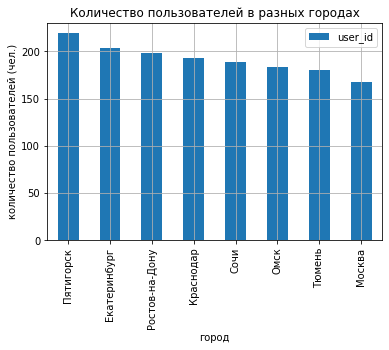

In [20]:
users_city = users_df.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
users_city.plot(grid=True, kind='bar')
plt.title('Количество пользователей в разных городах')
plt.xlabel('город')
plt.ylabel('количество пользователей (чел.)')
plt.show()

In [21]:
users_city.sort_values(by='user_id', ascending=False)/len(users_df)

,user_id
city,
Пятигорск,0.142764
Екатеринбург,0.132986
Ростов-на-Дону,0.129074
Краснодар,0.125815
Сочи,0.123207
Омск,0.119296
Тюмень,0.117340
Москва,0.109518


**Вывод:**
База пользователей представлена 8ю городами. Больше всего пользователей в Пятигорске (14%), меньше всего в Москве (10%). Однако, в целом доли клиентов примерно равные.

### Анализ соотношения пользователей с подпиской и без подписки

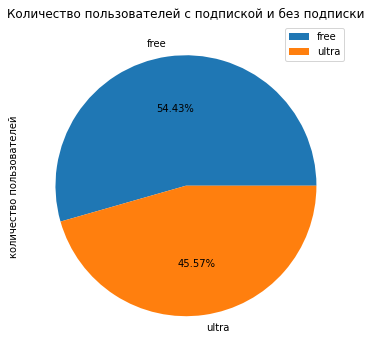

In [22]:
users_subscription = users_df.pivot_table(index='subscription_type', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
users_subscription.plot(y='user_id', kind='pie', autopct = '%.2f%%', figsize=(6, 6))
plt.title('Количество пользователей с подпиской и без подписки')
plt.ylabel('количество пользователей')
plt.show()

**Вывод:**
Чуть больше половины пользователей не пользуются подпиской (54%), с подпиской "ultra" чуть меньше половины пользователей (46%).

### Анализ возраста пользователей

In [23]:
users_df['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

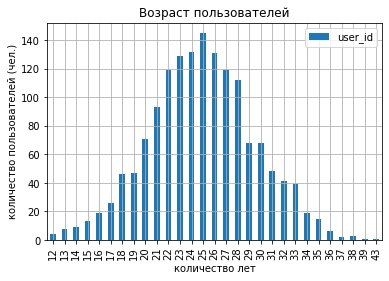

In [24]:
users_ages = users_df.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age')
users_ages.plot(grid=True, kind='bar')
plt.title('Возраст пользователей')
plt.xlabel('количество лет')
plt.ylabel('количество пользователей (чел.)')
plt.show()

**Вывод:**
Возраст пользователей в исследуемом датафрейме от 12 до 43 лет, при этом большинство - в диапазоне от 22 до 28 лет. Средний возраст пользователя 25 лет. График показывает нормальное распределение.

### Анализ расстояния, которое пользователь преодолевает за одну поездку

In [25]:
rides_df['distance'].describe()

count    18068.000000
mean      3070.159841
std       1116.831548
min          0.000000
25%       2542.750000
50%       3133.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64

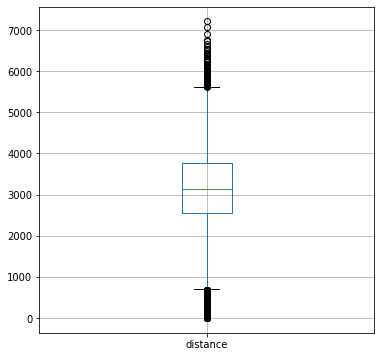

In [26]:
rides_df.boxplot(['distance'], figsize=(6, 6));

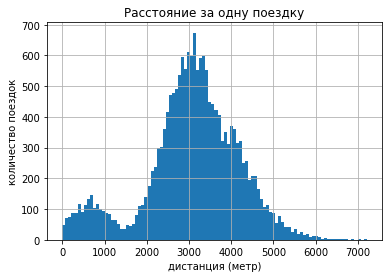

In [27]:
rides_df['distance'].hist(bins=100)
plt.title('Расстояние за одну поездку')
plt.xlabel('дистанция (метр)')
plt.ylabel('количество поездок')
plt.show()

**Вывод:**
Большинство пользователей преодолевают за 1 поездку от 2,5 км до 3,8 км. Наиболее часто встречается дистанция в 3,1 км. График размаха позволяет увидеть, что поездки примерно до 800 м и свыше 5,5 км можно отнести к "выбросам" данных. Значительная часть массива (без "выбросов) носит характер нормального распределения. Однако на гистограмме, весь массив данных по поездкам имеет дополнительный блок (примерно до 1,5 км) с пиком примерно 600-700 метров.

### Анализ продолжительности поездок

In [28]:
rides_df['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

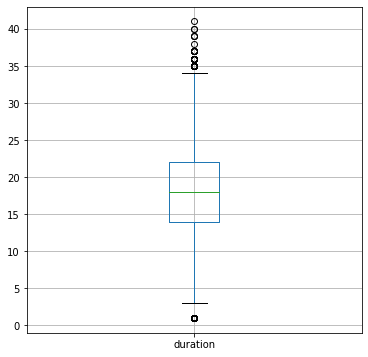

In [29]:
rides_df.boxplot(['duration'], figsize=(6, 6));

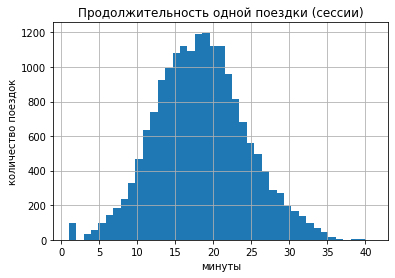

In [30]:
rides_df['duration'].hist(bins=41)
plt.title('Продолжительность одной поездки (сессии)')
plt.xlabel('минуты')
plt.ylabel('количество поездок')
plt.show()

**Вывод:**
Сессия большинства пользователей длится от 14 до 22 минут. Наиболее часто пользователи едут в течении 18 минут. График размаха позволяет увидеть, что поездки короче 3 минут и длиннее 34 минут можно отнести к "выбросам" данных. Значительная часть массива носит характер нормального распределения.  

### **Общий вывод:**
- Для анализа представлена база с пользователями из 8 городов из разных регионов РФ - южные города (Пятигорск, Ростов-на-Дону, Краснодар, Сочи), Урал и Сибирь (Екатеринбург, Омск, Тюмень), а также центральный регион (Москва).  Больше всего пользователей в Пятигорске (14%), меньше всего в Москве (10%). Однако, в целом доли клиентов примерно равные (12%-13%).
- Одна группа пользователей использует подписку (46%), а другая пользуется самокатом без неё (54%). 
- Большинство пользователей от 22 до 28 лет. Средний возраст - 25 лет. 
- Большинство пользователей преодолевают за 1 поездку от 2,5 км до 3,8 км. Чаще всего 1 сессия - 3,1 км. 
- Большинств пользователей на 1 сессию тратят от 14 до 22 минут. Наиболее часто пользователи едут в течении 18 минут.

## Объединение данных

### Объединим данные о пользователях, поездках и подписках в один датафрейм

In [31]:
users_subscriptions_df = pd.merge(users_df, subscriptions_df, on='subscription_type')
main_df = pd.merge(rides_df, users_subscriptions_df, on='user_id')
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  int64         
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   date_month         18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 1.8+ MB


In [32]:
main_df.duplicated().sum()

0

In [33]:
main_df.isna().sum()

user_id              0
distance             0
duration             0
date                 0
date_month           0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [34]:
main_df.head()

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754,7.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028,27.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Новый датафрейм, объединенный по id пользователей и типу подписки, имеет 18068 строк (идентично с датафреймом по количеству поездок). Явные дубликаты и пустые значения не выявлены.

#### Создадим датафрейм c данными о пользователях без подписки

In [35]:
main_df['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

In [36]:
free_df = main_df[main_df['subscription_type'] == 'free']
free_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   distance           11568 non-null  int64         
 2   duration           11568 non-null  float64       
 3   date               11568 non-null  datetime64[ns]
 4   date_month         11568 non-null  int64         
 5   name               11568 non-null  object        
 6   age                11568 non-null  int64         
 7   city               11568 non-null  object        
 8   subscription_type  11568 non-null  object        
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 1.1+ MB


#### Создадим датафрейм с данными о пользователях с подпиской

In [37]:
ultra_df = main_df[main_df['subscription_type'] == 'ultra']
ultra_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   int64         
 2   duration           6500 non-null   float64       
 3   date               6500 non-null   datetime64[ns]
 4   date_month         6500 non-null   int64         
 5   name               6500 non-null   object        
 6   age                6500 non-null   int64         
 7   city               6500 non-null   object        
 8   subscription_type  6500 non-null   object        
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 660.2+ KB


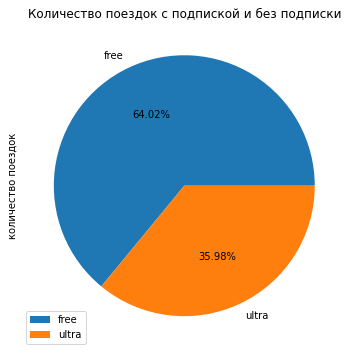

In [38]:
rides_subscription = main_df.pivot_table(index='subscription_type', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
rides_subscription.plot(y='user_id', kind='pie', autopct = '%.2f%%', figsize=(6, 6))
plt.title('Количество поездок с подпиской и без подписки')
plt.ylabel('количество поездок')
plt.show()

Доли поездок по подписке и без нее представлены в следующей пропорции: с подпиской - 36% поездок, без подписки - 64% поездок. 

### Анализ информации о расстоянии и времени поездок для пользователей обеих категорий.

#### Анализ информации о расстоянии для пользователей с подпиской и без нее

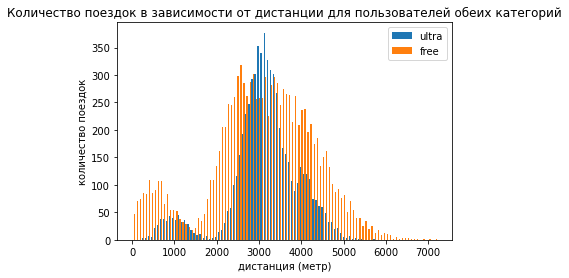

In [39]:
plt.hist([ultra_df['distance'], free_df['distance']], bins=100, label=['ultra', 'free']);
plt.title('Количество поездок в зависимости от дистанции для пользователей обеих категорий')
plt.xlabel('дистанция (метр)')
plt.ylabel('количество поездок')
plt.legend()
plt.show()

In [40]:
ultra_df['distance'].describe()

count    6500.000000
mean     3114.949231
std       836.894838
min       244.000000
25%      2785.000000
50%      3148.000000
75%      3560.000000
max      5699.000000
Name: distance, dtype: float64

In [41]:
free_df['distance'].describe()

count    11568.000000
mean      3044.992911
std       1246.174341
min          0.000000
25%       2366.000000
50%       3114.000000
75%       3905.000000
max       7211.000000
Name: distance, dtype: float64

#### Анализ информации о времени для пользователей с подпиской и без нее

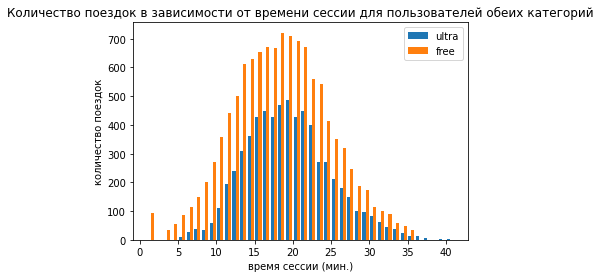

In [42]:
plt.hist([ultra_df['duration'], free_df['duration']], bins=40, label=['ultra', 'free']);
plt.title('Количество поездок в зависимости от времени сессии для пользователей обеих категорий')
plt.xlabel('время сессии (мин.)')
plt.ylabel('количество поездок')
plt.legend()
plt.show()

In [43]:
ultra_df['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

In [44]:
free_df['duration'].describe()

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

### **Вывод:**
- С подпиской совершается треть поездок, без подписки - 2/3 поездок.
- Несмотря на то, что обе группы пользователей чаще проезжают 3,1 км за одну сессию, для пользователей с подпиской характерен диапазон с 2785 м до 3560, а для пользователей без подписки диапазон более широкий - с 2366 до 3905. Визуальное представление зависимости количество поездок от дистанции одной сессии показывает, что пользователи без подписки чаще совершают поездки с дистанцией меньше 1,5 км.
- Визуализация взаимосвязи времени одной сессии и количества поездок для обеих категорий пользователей показывает, что в целом диапазоны и медианные значения совпадают, также среди пользователей без подписки есть сессии с очень коротким временем (меньше 5 мин.).

## Подсчёт выручки

### Создадим датафрейм (users_months_df) с агрегированными данными о поездках на основе датафрейма (main_df):

для каждого пользователя за каждый месяц
- суммарное расстояние 
- количество поездок 
- суммарное время 

также продублируем столбцы со стоимостью старта поездки, одной минуты поездки и подписки. 

In [45]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  int64         
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   date_month         18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(3)
memory usage: 1.8+ MB


Для добавления в сводную таблицу данных о наличии подписки добавим новый столбец в main_df с категоризацией данных о наличии подписки: 1 - есть подписка, 0 - без подписки.  

In [46]:
def subscription_is(row):
    if row == 'ultra':
        return 1
    else:
        return 0

main_df['subscription_is'] = main_df['subscription_type'].apply(subscription_is)

In [47]:
users_months_df = main_df.pivot_table(
    index=('user_id', 'date_month', ), 
    values=('date', 'distance', 'duration', 'subscription_is', 'minute_price', 'start_ride_price', 'subscription_fee'), 
    aggfunc=({'date':{'count'}, 'distance':{'sum'}, 'duration':{'sum'}, 'subscription_is':{'mean'}, 'minute_price':{'mean'}, 'start_ride_price':{'mean'}, 'subscription_fee':{'mean'}})
)
users_months_df

date distance duration minute_price start_ride_price  \
                   count      sum      sum         mean             mean   
user_id date_month                                                         
1       1              2     7026     42.0            6                0   
        4              1      754      7.0            6                0   
        8              2     6722     46.0            6                0   
        10             2     5809     32.0            6                0   
        11             3     7002     56.0            6                0   
...                  ...      ...      ...          ...              ...   
1534    6              2     3409     26.0            8               50   
        8              2     7621     48.0            8               50   
        9              1     4928     23.0            8               50   
        11             4    13349     78.0            8               50   
        12             1     2371     16.0            8               50   

                   subscription_fee subscription_is  
                               mean            mean  
user_id date_month                                   
1       1                       199               1  
        4                       199               1  
        8                       199               1  
        10                      199               1  
        11                      199               1  
...                             ...             ...  
1534    6                         0               0  
        8                         0               0  
        9                         0               0  
        11                        0               0  
        12                        0               0  

[11331 rows x 7 columns]

In [48]:
users_months_df.columns = ['count_rides', 'full_distance', 'full_duration', 'minute_price', 'start_ride_price', 'subscription_fee', 'ultra_is']
users_months_df

count_rides  full_distance  full_duration  minute_price  \
user_id date_month                                                            
1       1                     2           7026           42.0             6   
        4                     1            754            7.0             6   
        8                     2           6722           46.0             6   
        10                    2           5809           32.0             6   
        11                    3           7002           56.0             6   
...                         ...            ...            ...           ...   
1534    6                     2           3409           26.0             8   
        8                     2           7621           48.0             8   
        9                     1           4928           23.0             8   
        11                    4          13349           78.0             8   
        12                    1           2371           16.0             8   

                    start_ride_price  subscription_fee  ultra_is  
user_id date_month                                                
1       1                          0               199         1  
        4                          0               199         1  
        8                          0               199         1  
        10                         0               199         1  
        11                         0               199         1  
...                              ...               ...       ...  
1534    6                         50                 0         0  
        8                         50                 0         0  
        9                         50                 0         0  
        11                        50                 0         0  
        12                        50                 0         0  

[11331 rows x 7 columns]

In [49]:
users_months_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11331 entries, (1, 1) to (1534, 12)
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   count_rides       11331 non-null  int64  
 1   full_distance     11331 non-null  int64  
 2   full_duration     11331 non-null  float64
 3   minute_price      11331 non-null  int64  
 4   start_ride_price  11331 non-null  int64  
 5   subscription_fee  11331 non-null  int64  
 6   ultra_is          11331 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 665.1 KB


### В датафрейм (users_months_df) добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. 

In [50]:
users_months_df['revenue_months'] = users_months_df['start_ride_price']*users_months_df['count_rides']+users_months_df['minute_price']*users_months_df['full_duration']+users_months_df['subscription_fee']
users_months_df.head()

count_rides  full_distance  full_duration  minute_price  \
user_id date_month                                                            
1       1                     2           7026           42.0             6   
        4                     1            754            7.0             6   
        8                     2           6722           46.0             6   
        10                    2           5809           32.0             6   
        11                    3           7002           56.0             6   

                    start_ride_price  subscription_fee  ultra_is  \
user_id date_month                                                 
1       1                          0               199         1   
        4                          0               199         1   
        8                          0               199         1   
        10                         0               199         1   
        11                         0               199         1   

                    revenue_months  
user_id date_month                  
1       1                    451.0  
        4                    241.0  
        8                    475.0  
        10                   391.0  
        11                   535.0

In [51]:
users_months_df['revenue_months'].sum()

3878641.0

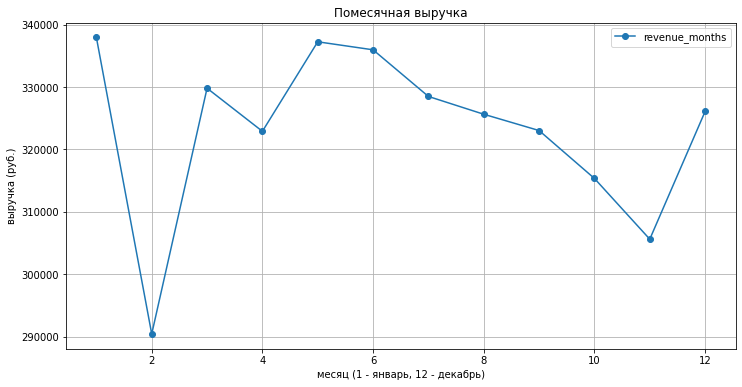

In [52]:
users_months_df.pivot_table(index=('date_month'), values=('revenue_months'), aggfunc=('sum')).plot(grid=True, style='o-', figsize=(12,6))
plt.title('Помесячная выручка')
plt.xlabel('месяц (1 - январь, 12 - декабрь)')
plt.ylabel('выручка (руб.)')
plt.show()

In [53]:
users_months_df.pivot_table(index=['ultra_is'], values=('revenue_months'), aggfunc=('sum', 'mean'))

,mean,sum
ultra_is,,
0,328.641365,2234104.0
1,362.792191,1644537.0


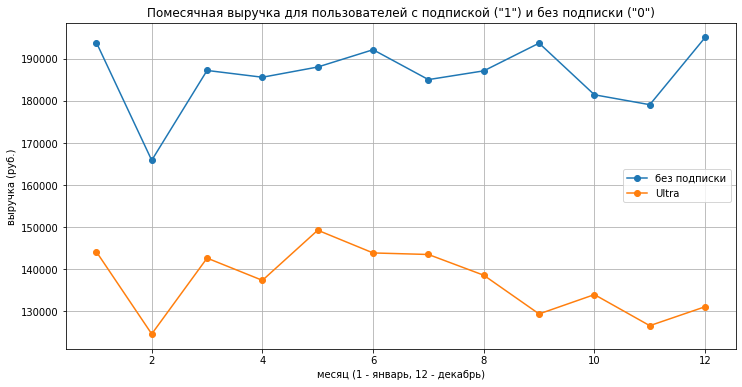

In [54]:
users_months_df.pivot_table(index=['date_month'], values=('revenue_months'), columns=['ultra_is'], aggfunc=('sum')).plot(grid=True, style='o-', figsize=(12,6))
plt.title('Помесячная выручка для пользователей с подпиской ("1") и без подписки ("0")')
plt.xlabel('месяц (1 - январь, 12 - декабрь)')
plt.ylabel('выручка (руб.)')
plt.legend(["без подписки", "Ultra"], loc='right')
plt.show()

### **Вывод**
- годовая выручка (по всем городам) составила 3 878 641 руб.
- помесячная выручка колеблется в диапазоне от 290 тыс.руб. (в феврале) и до 337 тыс.руб. (в январе).
- выручка в зависимости от наличия подписки у пользователей различается: пользователи без подписки принесли компании 57,6% выручки, в то время как пользователи с подпиской 42,4% годовой выручки. Такой высокий показатель обусловлен тем, что количество поездок без подписки значительно выше, чем количество поездок с подпиской. При этом стоит отметить, что средняя выручка у пользователей с подпиской выше, чем у другой группы клиентов.

## Проверка гипотез

### Гипотеза 1

Какие пользователи (с подпиской или без нее) тратят больше времени на поездки?
Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

Гипотеза 1:
- H0: среднее время одной сессии пользователей с подпиской *равно* среднему времени одной сессии пользователей без подписки;
- H1: среднее время одной сессии пользователей с подпиской больше среднего времени одной сессии пользователей без подписки. 

Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки, а также метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам - scipy.stats.ttest_ind

In [55]:
alpha = 0.05 # уровень статистической значимости
            
results = st.ttest_ind(
    ultra_df['duration'], 
    free_df['duration'],
    alternative='greater')

display('P-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

'P-value:'

2.4959453720736625e-34

Отвергаем нулевую гипотезу.


**Вывод:**
Нулевая гипотеза отпровергнута, среднее время пользователя с подпиской большей времени пользователя без подписки.

### Гипотеза 2

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Гипотеза 2:

- H0: среднее расстояние, проезжаемое пользователями с подпиской, равно оптимальному значению по износу самоката (3130 метров);
- H1: среднее расстояние, проезжаемое пользователями с подпиской, больше чем оптимальное значению по износу самоката.

Проведем односторонний тест и используем ttest_1samp:

In [56]:
wear_distance = 3160
alpha = 0.05 # уровень статистической значимости
            
results = st.ttest_1samp(
    ultra_df['distance'], 
    wear_distance,
    alternative='greater')

display('P-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

'P-value:'

0.9999927673300504

Не получилось отвергнуть нулевую гипотезу.


**Вывод:**
Нулевую гипотезу не удалось опровергнуть. Следовательно, можно говорить о том, что пользователи с подпиской используют самокат на меньшей дистанции, чем дистанция оптимального износа.  

### Гипотеза 3

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Гипотеза 3:

- H0: ежемесячная средняя выручка пользователей с подпиской и без неё равна;
- H1: ежемесячная средняя выручка пользователей с подпиской больше ежемесячной средней выручки пользователей без подписки.

In [57]:
users_ultra = users_months_df.loc[users_months_df['subscription_fee'] != 0, 'revenue_months']
users_free = users_months_df.loc[users_months_df['subscription_fee'] == 0, 'revenue_months']
display(f'среднее значение ежемесячной выручки для пользователей с подпиской: {np.mean(users_ultra)}')
display(f'среднее значение ежемесячной выручки для пользователей без подписки: {np.mean(users_free)}')

'среднее значение ежемесячной выручки для пользователей с подпиской: 362.7921906022502'

'среднее значение ежемесячной выручки для пользователей без подписки: 328.6413651073845'

In [58]:
alpha = 0.05 # уровень статистической значимости
            
results = st.ttest_ind(
    users_ultra, 
    users_free,
    alternative='greater')

display('P-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

'P-value:'

1.8850394384715216e-31

Отвергаем нулевую гипотезу.


**Вывод:**
Нулевая гипотезы опровергнута, выручки двух групп пользователей не равны. Можно говорить о том, что ежемесячная выручка пользователей с подпиской выше, чем у пользователей тез неё.

### Обоснование выбора теста для проверки гипотезы

Задача: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 

Так как для анализа используются две зависимые (парные) выборки и проверяется равенство среднего значения массива данных одних и тех же пользователей до и после обновления сервиса, будем использовать scipy.stats.ttest_rel. Для аргумента alternative укажем левостороннюю альтернативную гипотезу ('less') о том, что истинное среднее ген.совокупности до изменения больше, чем после изменения.

### **Вывод:**
- При проверке гипотезы о том, какие пользователи тратят больше времени на поездки была опровергнута гипотеза о том, что средних показатели групп пользователей с подпиской и без неё равны. Поэтому можно полагать, что средняя продолжительность поездки пользователя с подпиской больше средней поездки пользователя, который не оформлял подписку. Возможно, пользователи с подпиской могут быть «выгоднее» для компании. 
- Гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимальной для износа самоката дистанции, не удалось опровергнуть. Можно говорить о том, что пользователи с подпиской используют самокат на меньшей дистанции, чем дистанция оптимального износа. 
- Гипотеза о том, что ежемесячная выручка пользователей с подпиской и без неё равны не подтвердилась. Можно говорить о том, что ежемесячная выручка пользователей с подпиской выше, чем у пользователей тез неё.
- Для описанной ситуации используем scipy.stats.ttest_rel с аргументом alternative='less'.

## Вывод по проекту:

1. Загрузка и предобработка данных:
- Для проведения анализа пользователей сервиса  аренды самокатов были представлены 3 датафрейма. 
- Данные о пользователях и поездках взаимосвязаны по id пользователей сервиса, а с данными о подписках по типу подписки (с ней или без нее). 
- Датафрейм с пользователями содержит 1565 записи, однако были выявлены 31 дубликат, датафрейм о поездках - 18068 записей (без дубликатов), датафрейм о типе подписки содержит 2 записи - по типу пользования самокатом (с подпиской и без неё). Пустые значения отсутствуют.
- В данных о пользователях дубликаты были удалены. 
- В данных о поездках изменили тип данных: дистанцию и время пользования самоката перевели в числовые, дату пользования услугой - в специальный дата формат. Также добавили столбец с месяцами, для дальнейшего анализа.

2. Исследовательский анализ данных показал, что:
- Для анализа представлена база с пользователями из 8 городов из разных регионов РФ - южные города (Пятигорск, Ростов-на-Дону, Краснодар, Сочи), Урал и Сибирь (Екатеринбург, Омск, Тюмень), а также центральный регион (Москва). Больше всего пользователей в Пятигорске (14%), меньше всего в Москве (10%). Однако, в целом доли клиентов примерно равные (12%-13%).
- Одна группа пользователей использует подписку (46%), а другая пользуется самокатом без неё (54%).
- Большинство пользователей от 22 до 28 лет. Средний возраст - 25 лет.
- Наиболее популярная сессия длится 18 минут и имеет дистанцию 3,1 км. Большинство пользователей преодолевают за 1 поездку от 2,5 км до 3,8 км и тратят на это от 14 до 22 минут. 

3. Объединение данных
- Для дальнейшего анализа объединим изучаемые датафреймы по id пользователей и типу подписки. Новый датафрейм имеет 18068 строк, что идентично датафрейму по количеству поездок. 
- Без подписки совершается большинство сессий (2/3 от общего количества), и только треть - с подпиской.
- Несмотря на то, что обе группы пользователей чаще проезжают 3,1 км за одну сессию, для пользователей с подпиской характерен диапазон с 2785 м до 3560, а для пользователей без подписки диапазон более широкий - с 2366 до 3905. Визуальное представление зависимости количество поездок от дистанции одной сессии показывает, что пользователи без подписки чаще, чем пользователи с подпиской, совершают поездки с дистанцией меньше 1,5 км.
- Визуализация взаимосвязи времени одной сессии и количества поездок для обеих категорий пользователей показывает, что в целом диапазоны и медианные значения совпадают, однако также среди пользователей без подписки есть сессии с очень коротким временем (меньше 5 мин.).

4. Подсчёт выручки
- Для расчета выручки создали датафрейм с агрегированными данными за каждый месяц о поездках и стоимости услуг.
- Годовая выручка (по всем городам) составила 3 878 641 руб.
- Пользователи без подписки принесли компании 57,6% выручки, в то время как пользователи с подпиской 42,4% годовой выручки. Это объясняется тем, что количество поездок без подписки значительно выше, чем количество поездок с подпиской. 
- Помесячная выручка колеблется в диапазоне от 290 тыс.руб. (в феврале) и до 337 тыс.руб. (в январе).

5. Проверка гипотез 
- При проверке гипотезы о том, какие пользователи тратят больше времени на поездки была опровергнута гипотеза о том, что средних показатели групп пользователей с подпиской и без неё равны. Поэтому можно полагать, что средняя продолжительность поездки пользователя с подпиской больше средней поездки пользователя, который не оформлял подписку. Возможно, пользователи с подпиской могут быть «выгоднее» для компании.
- Гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимальной для износа самоката дистанции, не удалось опровергнуть. Можно говорить о том, что пользователи с подпиской используют самокат на меньшей дистанции, чем дистанция оптимального износа.
- Гипотеза о том, что ежемесячная выручка пользователей с подпиской и без неё равны не подтвердилась. Можно говорить о том, что ежемесячная выручка пользователей с подпиской выше, чем у пользователей тез неё.

6. **Рекомендации для рекламного отдела**
- Анализ выручки говорит о том, что в анализируемом году пользователи без подписки принесли "больше денег", однако показатели средней выручки и продолжительности 1ой сессии у пользователей с подпиской выше, чем у пользователей без подписки. На основе этого можно предположить, что группа пользователей с подпиской обладает большим потенциалом, а увеличение данной группы пользователей может привести к увеличению выручки в целом.